In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format


In [2]:
install = pd.read_csv('Datos\installs.csv.gzip',compression='gzip',engine='python')
install.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


In [3]:
install


,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,nan,False,False,6333597102633388268,"308,305,860,557,778,688.00","4,445,252,312,759,721,472.00",NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,nan
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,nan,False,False,6333597102633388268,"308,305,860,557,778,688.00","4,445,252,312,759,721,472.00",NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,nan
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,nan,False,True,6333597102633388268,"513,799,204,676,421,248.00","6,026,543,327,929,207,808.00",HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,"3,301,377,775,977,699,840.00"
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,nan,False,False,6333597102633388268,"513,799,204,676,421,248.00","6,026,543,327,929,207,808.00",NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,nan
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,nan,False,True,6333597102633388268,"1,083,368,711,068,077,952.00","7,876,611,839,898,798,080.00",HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,"3,301,377,775,977,699,840.00"
5,2019-03-10 22:24:57.545,0,1891515180541284343,8355110941557237501,nan,False,False,6333597102633388268,"1,083,368,711,068,077,952.00","7,876,611,839,898,798,080.00",NaN,NaN,NaN,NaN,NaN,NaN,685400811232710215,nan
6,2019-03-11 03:47:22.802,0,1891515180541284343,4306303321567254439,nan,False,True,6333597102633388268,"308,305,860,557,778,688.00","9,179,743,425,365,874,688.00",HasOffers Mobile AppTracking v1.0,NaN,b3f7905b-5058-4eca-853c-b3c670d7ac54,Open,NaN,NaN,7462893331703692427,"4,073,834,886,007,358,464.00"
7,2019-03-11 21:21:05.986,0,1891515180541284343,1670430602051291592,nan,False,False,6333597102633388268,"1,083,368,711,068,077,952.00","755,168,472,096,101,888.00",NaN,NaN,NaN,NaN,NaN,NaN,5634136297886425939,nan
8,2019-03-11 21:21:05.855,0,1891515180541284343,1670430602051291592,nan,False,True,6333597102633388268,"1,083,368,711,068,077,952.00","755,168,472,096,101,888.00",HasOffers Mobile AppTracking v1.0,NaN,28a6e6a0-ba70-46a2-a63f-1e74b0dd5235,Open,NaN,NaN,5634136297886425939,"3,301,377,775,977,699,840.00"
9,2019-03-13 08:29:31.875,2,1891515180541284343,5651666841804012468,nan,False,False,6333597102633388268,"308,305,860,557,778,688.00","8,656,854,488,683,104,256.00",http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 22; SM-J200M B...,NaN,NaN,True,NaN,5997848429649592955,"9,028,382,655,101,200,384.00"


In [4]:
tabla1 = install[install['implicit'] == True]
aplicacion_T=tabla1['application_id'].value_counts()
tabla2 = install[install['implicit'] == False]
aplicacion_F=tabla2['application_id'].value_counts()

In [5]:
impTrue=pd.concat([aplicacion_T],axis=1)
impTrue.columns = ['aplicacion_id']
impTrue

,aplicacion_id
9,196
7,172
10,142
8,102
16,93
2,39
29,26
20,26
15,20
6,12


Text(0,0.5,'Cantidad')

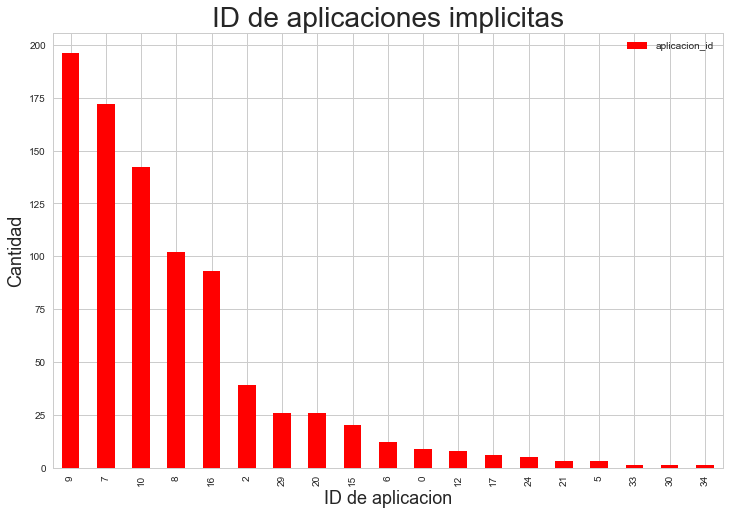

In [6]:
#Grafico de las aplicaciones con implicit = True

g = impTrue.plot.bar(color=["Red"],figsize=(12,8))
g.set_title("ID de aplicaciones implicitas", fontsize=28)
g.set_xlabel("ID de aplicacion",fontsize=18)
g.set_ylabel("Cantidad",fontsize=18)


In [7]:
impFalse=pd.concat([aplicacion_F],axis=1)
impFalse.columns = ['aplicacion_id']
impFalse

,aplicacion_id
7,775
9,535
16,269
10,247
8,226
2,135
29,71
20,69
1,34
26,28


Text(0,0.5,'Cantidad')

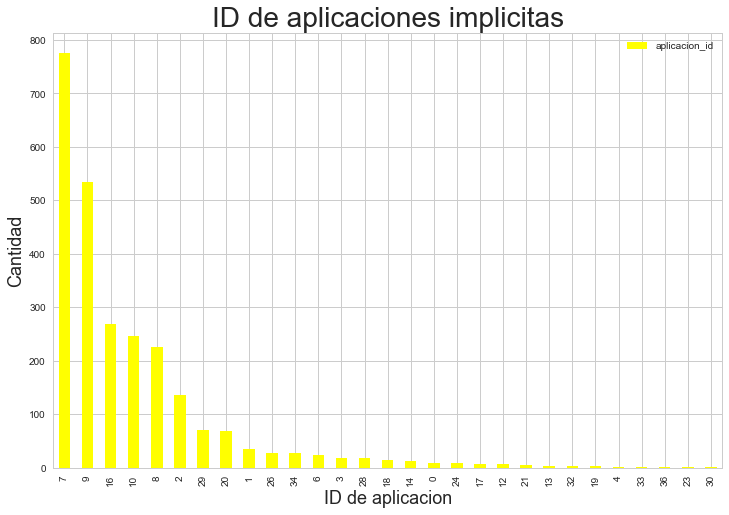

In [8]:
#Grafico de las aplicaciones con implicit = False

g = impFalse.plot.bar(color=["Yellow"],figsize=(12,8))
g.set_title("ID de aplicaciones implicitas", fontsize=28)
g.set_xlabel("ID de aplicacion",fontsize=18)
g.set_ylabel("Cantidad",fontsize=18)


In [9]:
impTrue['AppID_True'] = np.log(impTrue['aplicacion_id']+1)
impFalse['AppID_False'] = np.log(impFalse['aplicacion_id']+1)

impTotal = pd.concat([impFalse['AppID_False'],impTrue['AppID_True']],axis=1)
impTotal

,AppID_False,AppID_True
0,2.30,2.30
1,3.56,nan
2,4.91,3.69
3,2.89,nan
4,0.69,nan
5,nan,1.39
6,3.18,2.56
7,6.65,5.15
8,5.42,4.63
9,6.28,5.28


Text(0.5,0,'App ID')

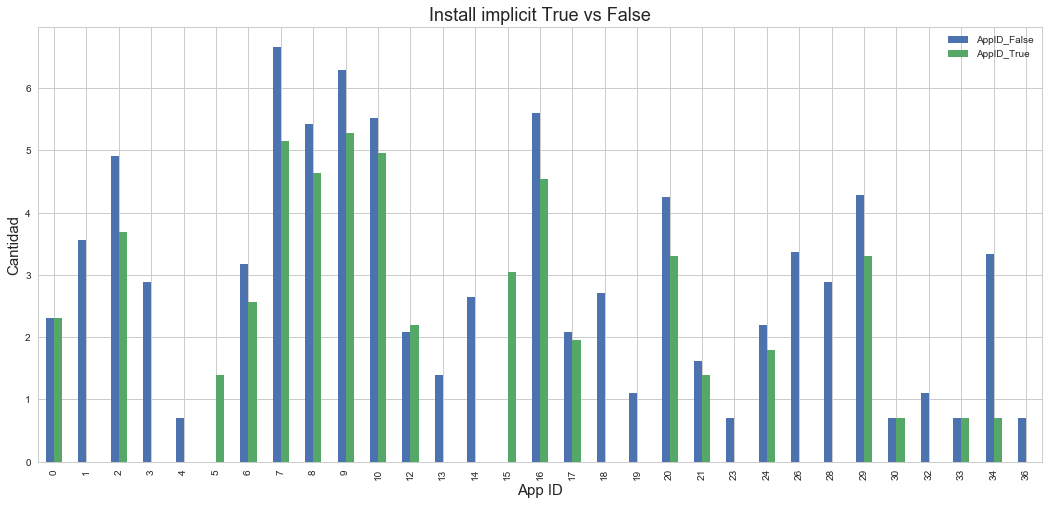

In [10]:
# Grafico de barras de installs por ID de Apps segun implicit

g = impTotal.plot.bar(figsize = (18,8))
g.set_title("Install implicit True vs False",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [11]:
# Atributed es cuando la instalación se le atribuye a Jampp
tablaAtributed2 = install[install['attributed'] == False]
attributed_F=tablaAtributed2['application_id'].value_counts()
attFalse=pd.concat([attributed_F],axis=1)
attFalse.columns = ['aplicacion_id']
attFalse['Att_False'] = np.log(attFalse['aplicacion_id']+1)

Text(0.5,0,'App ID')

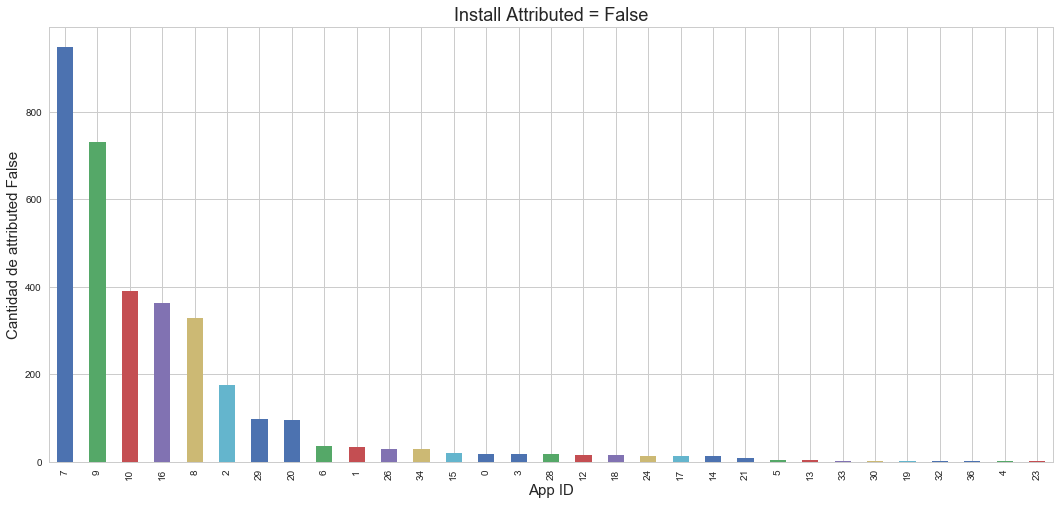

In [12]:
# TODOS los attributed son FALSE
# Grafico de barras de attributed por ID de Apps


g = attFalse['aplicacion_id'].plot.bar(figsize = (18,8))
g.set_title("Install Attributed = False",fontsize=18)
g.set_ylabel("Cantidad de attributed False",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [33]:
tablaWiFi_T = install[install['wifi'] == True]
wifi_T=tablaWiFi_T['application_id'].value_counts()
tablaWiFi_F = install[install['wifi'] == False]
wifi_F=tablaWiFi_F['application_id'].value_counts()


In [47]:
wifiTrue=pd.concat([wifi_T],axis=1)
wifiTrue.columns = ['Cant True']
wifiFalse=pd.concat([wifi_F],axis=1)
wifiFalse.columns = ['Cant False']
wifiTotal = pd.concat([wifiFalse['Cant False'],wifiTrue['Cant True']],axis=1)

Text(0.5,0,'App ID')

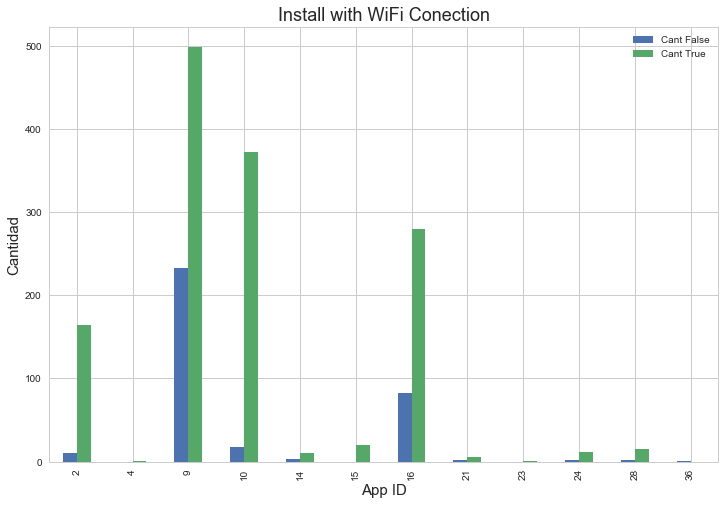

In [50]:

g = wifiTotal.plot.bar(figsize = (12,8))
g.set_title("Install with WiFi Conection",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)